# YOLO(You Only Look Once)

#### 객체 감지 (yolov8l.pt, yolov8m.pt, yolov8n.pt, yolov8s.pt, yolov8x.pt, yolov8x6.pt)
#### 분할 (yolov8l-seg.pt, yolov8m-seg.pt, yolov8n-seg.pt, yolov8s-seg.pt, yolov8x-seg.pt)
#### 분류 (yolov8l-cls.pt, yolov8m-cls.pt, yolov8n-cls.pt, yolov8s-cls.pt, yolov8x-cls.pt)

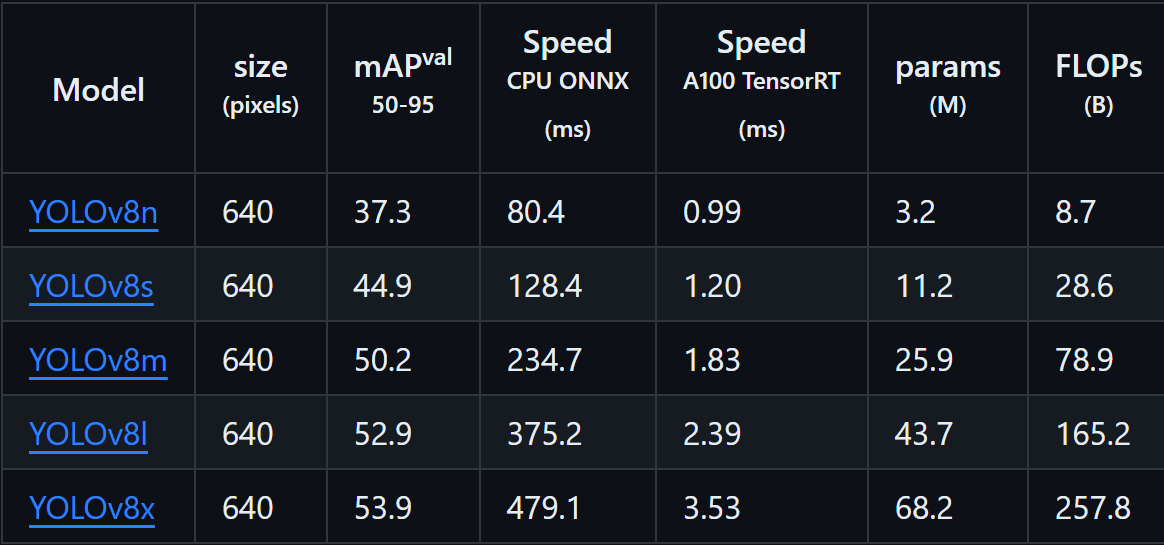

* 'n' 모델 이미지 객체인식에 약 40~50[ms]가 소요 된다.
* 'x' 모델 이미지 객체인식에 약 300~400[ms]가 소요된다.

# CLI 기본 사용법
* yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

* 이미지에서 객체 탐지
    - yolo predict model=yolov8n.pt source='image.jpg'
* 비디오에서 객체 탐지
    - yolo predict model=yolov8n.pt source='video.mp4'
* 웹캠을 사용하여 실시간 객체 탐지
 - yolo predict model=yolov8n.pt source=0 show=True

1. 여러 이미지 파일을 받아 드라이브에 업로드
2. 모델을 구축
3. 업로드된 이미지 파일 모델 적용

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 9.8 MB/s eta 0:00:00


In [2]:
from google.colab import files
import os
import shutil

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일이 들어갈 폴더 생성
folder_name = 'upload_images'
os.makedirs(folder_name, exist_ok=True)

# 업로드된 파일을 폴더로 이동
for filename in uploaded.keys():
    src_path = filename
    dest_path = os.path.join(folder_name, filename)
    shutil.move(src_path, dest_path)

# 폴더 안의 파일 목록 출력
print(f'Files moved to folder {folder_name}: {os.listdir(folder_name)}')

Saving 거리.jpg to 거리.jpg
Saving 거실.jpg to 거실.jpg
Saving 교실.jpg to 교실.jpg
Saving 길거리.jpg to 길거리.jpg
Saving 도로.jpg to 도로.jpg
Saving 사무실.jpg to 사무실.jpg
Saving 옷가게.jpg to 옷가게.jpg
Saving 책상.jpg to 책상.jpg
Saving 카페.jpg to 카페.jpg
Files moved to folder upload_images: ['도로.jpg', '교실.jpg', '옷가게.jpg', '길거리.jpg', '거실.jpg', '거리.jpg', '사무실.jpg', '카페.jpg', '책상.jpg']


In [24]:
# 파일명 변경
# 받아온 파일명을 정리해야 나중에 편할 듯
import os
folder_path = '/content/upload_images'
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
png_files.sort()  # 파일을 정렬하여 이름을 순차적으로 변경합니다.
for i, file in enumerate(png_files, start=1):
    # 새 파일명 설정 (image_1.png, image_2.png, ...)
    new_file_name = f"image_{i}.png"
    # 파일 이름 변경
    os.rename(os.path.join(folder_path, file), os.path.join(folder_path, new_file_name))
print("파일 이름 변경 완료!")

파일 이름 변경 완료!


In [25]:
import ultralytics
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

In [58]:
from ultralytics import YOLO

# 모델 불러오기
# yolov8x6.pt로 한번 돌려 보기
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')  # 사전 훈련된 모델
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # 가중치 전송

# 모델 학습
# 실제로는 에폭 증가 시키기
result = model.train(data='coco128.yaml', epochs=100, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.994G      1.291      1.572      1.188         79        320: 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        929      0.706      0.419      0.503      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.992G      1.243      1.634      1.176        120        320: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        128        929      0.741      0.429      0.518      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.984G      1.223      1.432      1.143        108        320: 100%|██████████| 8/8 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        128        929      0.724      0.442      0.531      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.992G      1.206      1.414      1.143        114        320: 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        128        929      0.721      0.451      0.548      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.992G      1.197      1.375      1.141         68        320: 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        128        929      0.637      0.507      0.562      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.992G      1.225      1.303      1.117         95        320: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        128        929      0.696      0.499      0.568      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.992G        1.2      1.271      1.139        113        320: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        128        929      0.671      0.511      0.576      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.994G      1.172      1.255      1.138         67        320: 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        128        929      0.689      0.511      0.578      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.984G      1.189      1.245      1.117        140        320: 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        128        929      0.734      0.504      0.579       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.977G      1.176      1.202       1.13        104        320: 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        128        929      0.775      0.492      0.585      0.423



10 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]


                   all        128        929      0.776      0.492      0.586      0.423
                person        128        254      0.927      0.461      0.634      0.425
               bicycle        128          6       0.73      0.167      0.171      0.169
                   car        128         46       0.65      0.087      0.137     0.0936
            motorcycle        128          5      0.781          1      0.962      0.793
              airplane        128          6      0.857      0.833      0.845      0.701
                   bus        128          7      0.961      0.714      0.722       0.63
                 train        128          3      0.749          1      0.995      0.962
                 truck        128         12      0.509     0.0833      0.367      0.213
                  boat        128          6          1      0.314      0.582      0.406
         traffic light        128         14      0.577      0.143      0.162      0.127
             stop sig

In [ ]:
import torch

# # 학습 시킨 모델 가중치 저장
# torch.save(model.state_dict(), 'yolo_weights.pth')
# # 학습 시킨 모델 저장
# torch.save(model, 'yolo_model.pth')

# # 모델 아키텍처만 불러오기
# model = torch.load('yolo_model.pth')

# # 모델 가중치만 불러오기 (모델 아키텍처는 미리 정의되어 있어야 함)
# model = YOLO()  # 예시로 YOLO 클래스의 인스턴스 생성
# model.load_state_dict(torch.load('yolo_weights.pth'))

In [66]:
# pre_trained model 불러오기 or 파인튜닝한 모델 불러오기
# 파인 튜닝까지 시간이 생기면 도전

# 예측 실행
want_images = '/content/upload_images'
results = model.predict(want_images,task = 'detect',save = True)  # 이미지에 대한 예측 실행


image 1/9 /content/upload_images/image_1.png: 320x256 3 cars, 1 clock, 19.5ms
image 2/9 /content/upload_images/image_2.png: 320x320 4 couchs, 4 potted plants, 15.2ms
image 3/9 /content/upload_images/image_3.png: 256x320 1 person, 5 chairs, 4 dining tables, 13.7ms
image 4/9 /content/upload_images/image_4.png: 320x224 5 persons, 3 cars, 13.5ms
image 5/9 /content/upload_images/image_5.png: 256x320 12 persons, 4 cars, 1 motorcycle, 1 traffic light, 15.8ms
image 6/9 /content/upload_images/image_6.png: 192x320 4 chairs, 2 dining tables, 1 tv, 2 refrigerators, 17.0ms
image 7/9 /content/upload_images/image_7.png: 320x320 3 persons, 1 cat, 1 bowl, 2 chairs, 14.2ms
image 8/9 /content/upload_images/image_8.png: 320x320 3 mouses, 1 keyboard, 15.2ms
image 9/9 /content/upload_images/image_9.png: 320x256 9 chairs, 3 potted plants, 2 dining tables, 1 vase, 14.9ms
Speed: 1.5ms preprocess, 15.4ms inference, 2.8ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs/detect/train43


In [84]:
import os
import shutil

original_dir = f'runs/detect/predict'
output_dir = '/content/output'

# 목적지 디렉토리가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 원본 디렉토리의 내용을 목적지 디렉토리로 복사
for item in os.listdir(original_dir):
    s = os.path.join(original_dir, item)
    d = os.path.join(output_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)
print('output폴더에 저장 완료')

파일 저장 완료
